# <h1 align='center'> <b> 💻 LẬP TRÌNH SONG SONG 💻 </b> </h1>

Ngành: Khoa Học Dữ Liệu

Lớp: 20KDL1

Nhóm: 8

Giảng viên: Phạm Trọng Nghĩa, Trần Quốc Huy.

---
## 🧨 TOPIC:<h1 align='center'> <b>  Parallelize and optimize: image resize using seam carving </b> </h1>




**Thành viên thực hiện**

* *20280006 - Nguyễn Quốc Bảo*
* *20280007 - Võ Thái Bình*
* *20280024 - Trần Nguyễn Nhất Duy*

**Nội dung chính**

⭐Lời Nói Đầu

⭐Nội Dung Bài

        1. Main idea
        2. Thuật hiện tuần tự( Sequential implementation)
            * Convert from RGB to Grayscale
            * Convolution
            * Calculate the energy of each pixels using gradient magnitude
            * Find low energy seams
            * Remove low-energy seams
        3. Thực hiện song song( Parallel implementation)
            * Convert from RGB to Grayscale in Kernal
            * Calculate ImportanceMap in Kernal
            * Calculate CumulativeMap in Kernal
            * Find low energy seams in Kernal
            * Remove low-energy seams in Kernal
            * Demonstration with images
        4. Tối ưu hóa
            * ComputeEnergy_Kernel_v1 using shared memory
            * ConvertRgb2Gray_Kernel_v2 using parallel reduction
            * Demonstration with images
            
⭐Tổng Kết.

# <h1> <b> 🌻 LỜI NÓI ĐẦU 🌻</b> </h1>

<p align="justify">Seam carving là một thuật toán dùng để thay đổi kích thước hình ảnh, nó được giới thiệu trong bài báo cáo khoa học của S. Avidan & A. Shamir. Trong bài báo, việc thay đổi kích thước ảnh được thực hiện bằng cách loại bỏ đi các điểm ảnh ít quan trọng và giữ lại các điểm ảnh quan trọng. Bức ảnh dưới đây là minh họa điều này (ảnh bên trên là ảnh gốc với kích thước 640x480 và ảnh bên dưới là ảnh sau khi áp dụng thuật toán seam carving đẻ thu nhỏ còn lại kích thước là 500x480).

<p align="justify">Mục tiêu chính của seam carving bao gồm:

  1. Giữ nguyên nội dung quan trọng: Seam carving cố gắng giữ lại những phần tử quan trọng trong ảnh, chẳng hạn như các đối tượng hay cấu trúc quan trọng, trong khi giảm hoặc mở rộng kích thước của ảnh.

  2. Tránh biến dạng không tự nhiên: Trong khi thay đổi kích thước, seam carving giữ cho các phần tử trong ảnh không bị biến dạng một cách không tự nhiên. Điều này giúp duy trì hình dạng tự nhiên của các đối tượng trong ảnh.

  3. Tự động và thông minh: Seam carving thường sử dụng các thuật toán thông minh để xác định những "đường dẫn" (seams) nào có thể được loại bỏ mà không làm mất quá nhiều thông tin chất lượng.

  4. Tính ứng dụng rộng rãi: Seam carving có thể được áp dụng cho nhiều mục đích, từ việc thay đổi kích thước ảnh đến việc tạo ảnh thu nhỏ cho các thiết bị di động mà vẫn giữ nguyên nội dung chính.

  5. Tối ưu về mặt thị giác: Mục tiêu là tạo ra ảnh đã được thay đổi kích thước mà vẫn duy trì được chất lượng và độ tương phản một cách tốt nhất.

Nói tóm lại, seam carving đã được sử dụng rộng rãi trong lĩnh vực xử lý ảnh và đồ họa máy tính để tạo ra các ảnh thay đổi kích thước mà không làm mất đi sự quan trọng của nội dung hình ảnh.


![original](https://drive.google.com/uc?id=106tAQpTB_WmuutPxM6bo_u7HOXCWosAa)

![resize](https://drive.google.com/uc?id=1_QdjxFOZpJOgoKRXM6ife5MKHx0L-oUO)

# ***I. THỰC HIỆN TUẦN TỰ***

## 1️⃣ **Main idea - Ý tưởng chính**

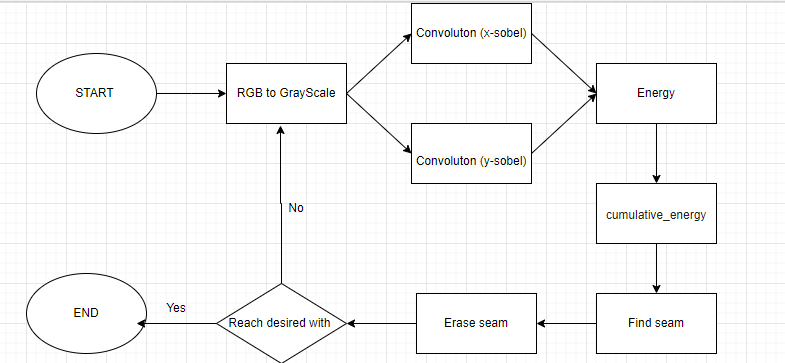

**Các bước chính của thuật toán Seam Carving:**
1. Chuyển không gian màu RGB sang GrayScale  :
    * Trong không gian màu độ xám, mỗi pixel chỉ có giá trị độ sáng, giúp giảm độ phức tạp của quá trình tính toán so với không gian màu RGB với ba kênh màu (đỏ, xanh lá cây, và lam).

1. Tính toán năng lượng của từng pixel:

    * Đầu tiên, tính toán độ chênh lệch năng lượng của từng pixel trong hình ảnh. Năng lượng của một pixel thường được định nghĩa dựa trên gradient của pixel đó, tức là sự thay đổi của giá trị pixel xung quanh.
2. Xác định seam có năng lượng thấp nhất:

    * Sử dụng thông tin về năng lượng tính toán ở bước trước, xác định một "seam" có tổng năng lượng thấp nhất. Seam này thường đi qua các pixel có giá trị năng lượng thấp, tức là ít thay đổi màu sắc.
3. Loại bỏ hoặc thêm seam:

    * Nếu mục tiêu là giảm kích thước của hình ảnh, loại bỏ seam có tổng năng lượng thấp nhất. Điều này sẽ làm giảm chiều rộng hoặc chiều cao của hình ảnh.
    * Nếu mục tiêu là tăng kích thước, thêm seam có tổng năng lượng thấp nhất. Điều này sẽ làm tăng chiều rộng hoặc chiều cao của hình ảnh.
4. Lặp lại quá trình:

    * Lặp lại từ bước 1 cho đến bước loại bỏ hoặc thêm seam.


## Định nghĩa cấu trúc cần thiết:
```cpp
typedef struct {
     unsigned char red,green,blue;
} PPMPixel;

typedef struct {
     int x, y;
     PPMPixel *data;
} PPMImage;
```
**PPMPixel:**

Đây là một cấu trúc dữ liệu đơn giản đại diện cho một pixel trong hình ảnh PPM. Nó bao gồm ba trường dữ liệu là red, green, và blue, mỗi trường có kiểu dữ liệu là unsigned char. Mỗi pixel trong hình ảnh PPM được biểu diễn bằng một tổ hợp của ba màu cơ bản: đỏ, xanh lá cây và xanh dương.

**PPMImage:**

Cấu trúc này đại diện cho toàn bộ hình ảnh PPM. Nó chứa hai trường dữ liệu là x và y, là kích thước của hình ảnh (số pixel theo chiều ngang và chiều dọc), và một trường data là con trỏ đến một mảng các pixel (PPMPixel). Do đó, data là một mảng hai chiều các pixel, trong đó mỗi pixel được biểu diễn bởi cấu trúc PPMPixel.

## 2️⃣ **Change RGB to GrayScale**

![grayscale](https://drive.google.com/uc?id=1ZVotRj3ZgHSNnBaX0Cv40manNXCsPkvY)

Tại sao phải chuyển không gian màu RGB sang GrayScale:

* Tính toán năng lượng: Trong seam carving, một trong những bước quan trọng là tính toán năng lượng của từng pixel. Trong không gian màu độ xám, mỗi pixel chỉ có giá trị độ sáng, giúp giảm độ phức tạp của quá trình tính toán so với không gian màu RGB với ba kênh màu (đỏ, xanh lá cây, và lam).


* Giảm độ phức tạp tính toán: Ảnh RGB yêu cầu xử lý thông tin từ ba kênh màu, trong khi ảnh độ xám chỉ sử dụng một kênh. Điều này giúp giảm độ phức tạp tính toán và tăng hiệu suất của thuật toán.
* Lưu trữ bộ nhớ: Ảnh độ xám yêu cầu ít bộ nhớ hơn so với ảnh RGB vì không phải lưu trữ thông tin của ba kênh màu. Điều này có thể giúp tối ưu hóa sử dụng bộ nhớ và giảm tải cho hệ thống.

* Đồng nhất thông tin: Trong nhiều trường hợp, việc chuyển đổi sang độ xám giúp đồng nhất thông tin trong hình ảnh, tập trung vào độ sáng thay vì màu sắc. Điều này có thể hữu ích trong việc bảo toàn các đối tượng chính khi thực hiện seam carving.


Công thức chuyển :  <mark>gray = 0.299 * red + 0.587 * green + 0.114 * blue</mark>

Trong đó, mỗi thread sẽ xử lý từng Pixel, đọc ghi dữ liệu từ GMEM.

## 3️⃣ **Convolution**


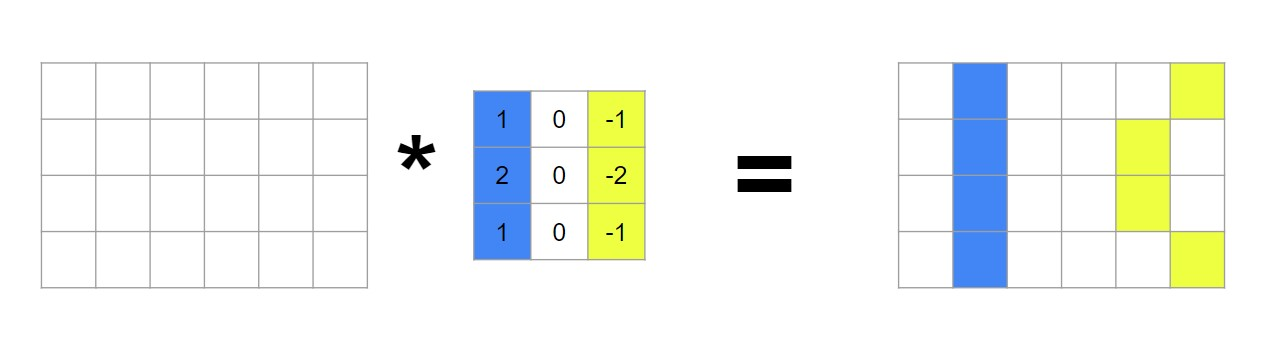

Phép convolution thường được sử dụng để đánh giá tầm quan trọng của mỗi pixel trong ảnh, với đặc tính quan trọng là "tổng của tất cả các phần tử trong bộ lọc bằng 0."

Trong ví dụ trên, bộ lọc x-Sobel thường được sử dụng để phát hiện cạnh theo chiều dọc. Trong trường hợp sử dụng ảnh xám (từ 0 đến 255, từ tối đến sáng), nếu giá trị ở bên trái lớn hơn nhiều so với giá trị ở bên phải, kết quả của pixel đó sẽ là dương (được đánh dấu màu xanh lam), và ngược lại.

Điều này có nghĩa là kết quả sẽ gần với 0 ở những vùng không có cạnh và giá trị lớn sẽ đại diện cho sự xuất hiện của một cạnh. Tuy nhiên, các giá trị này có thể là dương hoặc âm.

Mặc dù cạnh có thể là dương hoặc âm, điều này không quan trọng. Bởi vì chúng ta có thể quay bộ lọc 180° để chuyển giá trị dương thành giá trị âm và ngược lại.

Từ đó, chúng ta có thể sử dụng giá trị tuyệt đối (hàm abs) trước khi cộng với bộ lọc y-Sobel.

**Example: Convolution between a grayscale picture with x-Sobel and y-Sobel**
![image](https://drive.google.com/uc?id=1QjQiCp35vmw0jxP2mEu1Mi2Zj_3p5Y3w)


## **4️⃣ Calculate the energy of each pixels using gradient magnitude**

Kernel Sobel: x_sobel và y_sobel là các kernel Sobel được sử dụng để phát hiện cạnh theo hướng ngang và dọc. Cả hai kernel này có kích thước 3x3.
Khởi tạo importance map:

Tạo một mảng importancemap có kích thước width * height để lưu trữ giá trị quan trọng của từng pixel.

**Tính toán gradient:**

  * Một vòng lặp lồng nhau duyệt qua từng pixel trong ảnh (trong hàng và cột).
Tại mỗi pixel, tính toán gradient theo hướng ngang (Gx) và hướng dọc (Gy) bằng cách áp dụng kernel Sobel.

**Tính toán giá trị quan trọng:**

  * Tại mỗi pixel, tính toán giá trị quan trọng bằng cách lấy giá trị tuyệt đối của gradient theo hướng ngang và hướng dọc, sau đó cộng chúng lại với nhau (importancemap[row*width + col] = abs(Gx) + abs(Gy)).

**Trả về importance map:** Cuối cùng, importance map được trả về. Nó chứa thông tin về độ quan trọng của mỗi pixel trong ảnh, dựa trên cạnh được phát hiện bằng kernel Sobel.

## 5️⃣Caculated cumulative_energy:
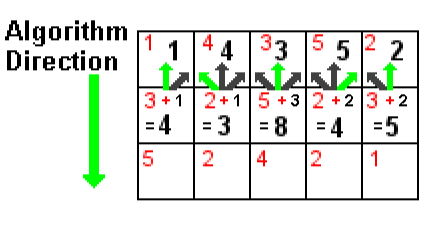

Sau khi đã tính được importance map, ta tiến hành chuyển qua bước tính cumulative_energy trước khi tìm find seam.
* Khởi tạo mảng 2 chiều cumulative_energy: Một mảng 2 chiều cumulative_energy được tạo ra, với kích thước height x width, và mỗi phần tử là một số nguyên. Mỗi con trỏ trong mảng chính là một hàng của ma trận.
* Sao chép hàng đầu tiên từ importantmap vào cumulative_energy: Hàng đầu tiên của cumulative_energy được sao chép từ mảng importantmap. Điều này giữ nguyên giá trị của hàng đầu tiên và dùng nó làm điểm bắt đầu để tính toán năng lượng tích luỹ.
* Tính toán năng lượng tích luỹ cho các hàng còn lại:
  * Vòng lặp ngoại cùng chạy qua từng hàng của cumulative_energy, bắt đầu từ hàng thứ hai (i = 1) vì hàng đầu tiên đã được sao chép từ importantmap.
  * Vòng lặp trong cùng chạy qua từng cột của cumulative_energy.
  * Tại mỗi điểm (i, j), năng lượng tích luỹ được tính dựa trên giá trị của importantmap tại vị trí tương ứng và giá trị tích luỹ của các điểm lân cận ở hàng trước đó (cumulative_energy[i-1][j-1], cumulative_energy[i-1][j], cumulative_energy[i-1][j+1]).
  * Các trường hợp đặc biệt được xử lý khi j - 1 < 0 hoặc j + 1 > width - 1 để tránh truy cập vào các vị trí không hợp lệ trong ma trận.

## 6️⃣ **Find low energy seams**

Đường seam thường được tìm để xác định những pixel nào nên bị loại bỏ khi thực hiện Seam Carving.


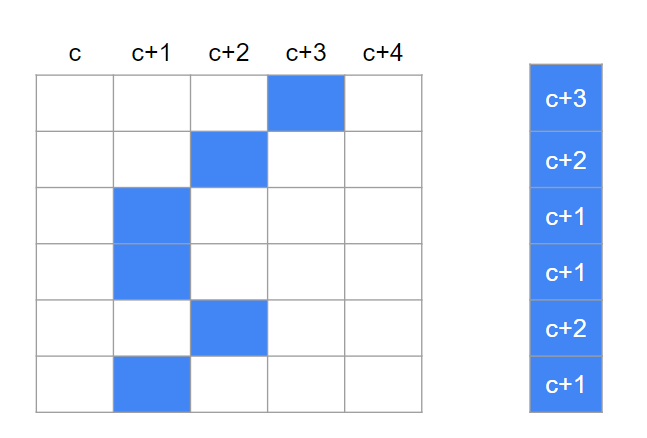

* **Tìm kiếm điểm có năng lượng tích luỹ nhỏ nhất ở hàng cuối cùng (height - 1):** Sử dụng hàm findMinIndex để tìm vị trí của giá trị nhỏ nhất trong hàng cuối cùng của cumulative_energy. Hàm này nhận vào một mảng và khoảng cách của phần tử nhỏ nhất trong mảng, sau đó trả về chỉ số của phần tử đó.
* **Gán giá trị của min_energy_index cho phần tử cuối cùng của mảng seam:** Gán giá trị của min_energy_index vào phần tử cuối cùng của mảng seam. Điều này là bước khởi tạo cho quá trình backtrack (truy vết ngược).
* **Truy vết ngược (backtrack) để xác định đường chân không:**
  * Sử dụng vòng lặp để duyệt qua từ hàng height - 2 đến 0 (hàng trước hàng cuối cùng).
  * Tại mỗi bước, sử dụng hàm findMinIndex để tìm vị trí của giá trị nhỏ nhất trong cumulative_energy[i], nhưng chỉ tìm trong khoảng max(0, min_energy_index -1) đến min(width -1, min_energy_index +1). Điều này giúp giữ cho đường chân không di chuyển một cách liền mạch và không quá đột ngột.
  * Gán giá trị của min_index vào mảng seam tại vị trí i.
  * Tiếp tục quá trình này từ hàng dưới lên đến hàng đầu tiên, xác định toàn bộ đường chân không. Cuối cùng, mảng seam sẽ chứa các chỉ số của các cột tạo thành đường chân không trên hình ảnh.

Ví dụ:

* Lấy vị trí cột của "giá trị tối thiểu của hàng đầu tiên" (c+1)
* Lấy 3 giá trị của: (c+1)-1; (c+1); (c+1)+1; lấy giá trị nhỏ nhất là (c+1)+1  = c+2. Lưu vào mảng bên phải.
* Tiếp tục đi cho đến khi đến hàng cuối cùng.

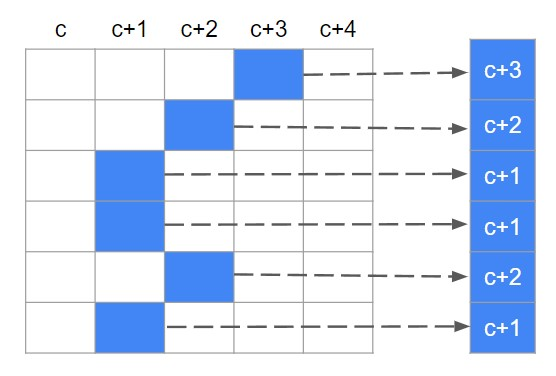


## 7️⃣ **Remove low-energy seams**

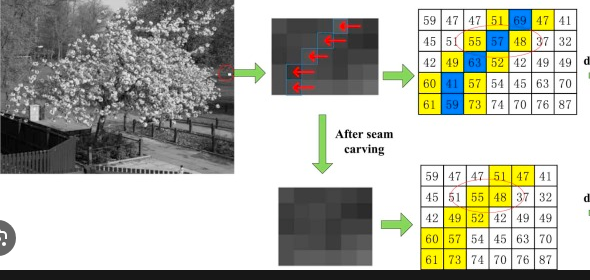

Quá trình loại bỏ seam khỏi ảnh được  thực hiện bằng cách tạo ra một ảnh mới (new_img) mà không bao gồm các pixel nằm trên đường seam.

Ý tưởng: Kiểm tra giá trị của seam[y] để xác định vị trí của đường seam trong hàng y, sau đó dựa vào vị trí này để loại bỏ các pixel và sao chéo các pixel còn lại sang ảnh mới.

**1. Xử lý khi seam[y] = 0 (đường seam bắt đầu từ vị trí 0):**

Nếu seam[y] bằng 0, có nghĩa là đường seam bắt đầu từ vị trí đầu tiên của hàng y. Ta loại bỏ pixel đầu tiên và sao chép các pixel còn lại sang ảnh mới (new_img).

**2. Xử lý khi 0 < seam[y] < width - 1 (đường seam ở giữa):**

*   Nếu seam[y] nằm giữa 0 và width - 1, có nghĩa là đường seam không bắt đầu hoặc kết thúc ở biên của ảnh.
*   Sao chép các pixel từ vị trí 0 đến seam[y] - 1 từ ảnh gốc (temp_img) sang new_img.
*   Sao chép các pixel từ seam[y] + 1 đến width - 1 từ ảnh gốc sang new_img.




**3. Xử lý khi seam[y] = width - 1 (đường seam kết thúc ở vị trí cuối cùng):**

Nếu seam[y] bằng width - 1, có nghĩa là đường seam kết thúc ở vị trí cuối cùng của hàng y. Ta loại bỏ pixel cuối cùng và sao chép các pixel còn lại sang new_img.


# ***II. THỰC HIỆN SONG SONG***


### **Lập trình song song là gì? Tác dụng của lập trình song song.**


Lập trình song song là một phương pháp lập trình mà công việc có thể được thực hiện đồng thời (parallel) trên nhiều tài nguyên tính toán. Một vài tác dụng chính của lập trình song song:
1.   **Tăng Hiệu Suất:** Lập trình song song giúp tận dụng được sức mạnh tính toán của nhiều tài nguyên cùng một lúc, giảm thời gian xử lý cho các tác vụ đòi hỏi nhiều tính toán.
2.   **Xử Lý Dữ Liệu Lớn:** Trong các ứng dụng xử lý dữ liệu lớn như khoa học dữ liệu, machine learning, và đồ họa máy tính, lập trình song song giúp tăng cường khả năng xử lý dữ liệu lớn và phức tạp.
3. **Đồng Thời Hóa Công Việc:** Các tác vụ có thể được chia nhỏ thành các công việc con độc lập và được xử lý đồng thời. Điều này giúp tăng cường khả năng đáp ứng và giảm thời gian chờ đợi.
4. **Tối Ưu Hóa Hiệu Năng:** Lập trình song song có thể giúp tối ưu hóa sử dụng tài nguyên tính toán, đảm bảo rằng mọi lõi và thread đều được sử dụng hiệu quả.
5. **Xử Lý Thời Gian Thực:** Trong các hệ thống yêu cầu xử lý thời gian thực, lập trình song song có thể giúp cải thiện khả năng xử lý đa nhiệm và giảm độ trễ.
6. **Tính Linh Hoạt:** Lập trình song song cung cấp tính linh hoạt trong việc xử lý các tác vụ đa dạng và thay đổi.
7. **Phát Hiện và Điều Chỉnh Lỗi Dễ Dàng Hơn:** Với lập trình song song, các lỗi có thể dễ dàng phát hiện và điều chỉnh, vì mỗi thread hoặc quy trình độc lập có thể được theo dõi và xử lý riêng biệt.
8. **Hỗ Trợ Tài Nguyên Đa Nhiệm:** Trong các hệ điều hành và môi trường máy tính đương đại, lập trình song song giúp hỗ trợ tài nguyên đa nhiệm, nơi nhiều ứng dụng và tiến trình có thể chạy cùng một lúc mà không làm giảm hiệu suất.






* Vậy tại sao phải tiến hành song song ở các bước sau? Để trả lời cho câu hỏi trên, chúng ta sẽ đi cụ thể vào từng bước được song song bên dưới.



## 1️⃣ **Change RGB to GrayScale in Kernal**

Code:
```cpp
__global__ void ConvertRgb2Gray_Kernel(PPMPixel * pixels, int width, int height, uint8_t * grayPic) {
    int r = blockIdx.y * blockDim.y + threadIdx.y;
    int c = blockIdx.x * blockDim.x + threadIdx.x;

    if (r < height && c < width) {
        grayPic[r*width+c] = 0.299f*pixels[r*width+c].red + 0.587f*pixels[r*width+c].green + 0.114f*pixels[r*width+c].blue;
    }
}
```

Giải thích:
* Sử Dụng Thông Tin Vị Trí:
    * blockIdx.y * blockDim.y + threadIdx.y và blockIdx.x * blockDim.x + threadIdx.x được sử dụng để tính toán vị trí của thread trong mảng 2D của hình ảnh.
    * Thông tin này giúp mỗi thread biết được vị trí cụ thể của điểm ảnh mà nó phải xử lý.
* Kiểm Tra Phạm Vi:
    * Đoạn mã if (r < height && c < width) giúp đảm bảo rằng mỗi thread chỉ xử lý các điểm ảnh nằm trong phạm vi hình ảnh thực tế. Các thread nằm ngoài phạm vi sẽ được bỏ qua.
* Tính Toán Grayscale:
    * Dòng mã grayPic[r*width+c] = 0.299f*pixels[r*width+c].red + 0.587f*pixels[r*width+c].green + 0.114f*pixels[r*width+c].blue; tính toán giá trị Grayscale của điểm ảnh dựa trên giá trị RGB tương ứng.
    * Công thức chuyển đổi này được tích hợp trong mỗi thread, giúp mỗi thread độc lập thực hiện chuyển đổi trên một điểm ảnh.
* Chia Công Việc:
    * Mỗi thread trong block được gán trách nhiệm xử lý một điểm ảnh cụ thể trong mảng hình ảnh.
    * Công thức chuyển đổi từ RGB sang Grayscale được tính toán độc lập cho từng điểm ảnh.



=>> Tất cả các thread trong một block chạy song song và độc lập với các block khác, điều này giúp tận dụng được sức mạnh song song của GPU và giảm thời gian xử lý so với việc thực hiện tuần tự trên CPU.

## 2️⃣ **ComputeImportanceMap in Kernal**


Code:
```cpp
__global__ void ComputeImportanceMap_Kernel(uint8_t * grayscalepixels, int *energy, int width, int height){
    int col = threadIdx.x + blockIdx.x * blockDim.x;
    int row = threadIdx.y + blockIdx.y * blockDim.y;
    
    // printf("Row: %d\n", row);
    // Handle boundary conditions
    if (col < width && row < height) {
      int Gx = 0;
      int Gy = 0;
      for ( int i = 0; i < 3; i++){
        for (int j = 0; j < 3; j++){
          int neighborRow = row + i;
          int neighborCol = col + j;
          
          if (neighborRow >= 0 && neighborRow < height && neighborCol >= 0 && neighborCol < width){
            int index = neighborRow*width + neighborCol;
            Gx += grayscalepixels[index]*x_sobel[i][j];
            Gy += grayscalepixels[index]*y_sobel[i][j];
          }
        }
      }
      energy[row*width + col] = abs(Gx) + abs(Gy);
    }
}

```

Giải thích:
* **Indexing và Block/Grid Dimensions:** col và row được tính toán bằng cách sử dụng thông tin về block và thread dimensions trong CUDA. threadIdx.x và blockIdx.x là indices của thread và block theo chiều ngang, tương tự với threadIdx.y và blockIdx.y theo chiều dọc. Những thông tin này giúp xác định vị trí của thread trong grid 2D.

* **Xử lý biên:** Trước khi tính toán độ chênh lệch, hàm kiểm tra xem thread đang xử lý có nằm trong biên của hình ảnh hay không. Nếu không, nó sẽ tiếp tục tính toán, nếu có, thì không làm gì cả.
* **Tính toán độ chênh lệch bằng bộ lọc Sobel:**
  * Dùng nested loops để duyệt qua một khu vực 3x3 quanh mỗi pixel để tính toán độ chênh lệch theo chiều ngang và chiều dọc. Các trọng số của bộ lọc Sobel được định nghĩa bởi mảng x_sobel và y_sobel.
  * Gx và Gy lưu trữ độ chênh lệch tích lũy theo chiều ngang và chiều dọc.
* **Lưu trữ năng lượng tích lũy vào mảng energy:** Tại mỗi vị trí (row, col) trong hình ảnh, năng lượng tích lũy được tính bằng cách lấy giá trị tuyệt đối của tổng độ chênh lệch theo chiều ngang và chiều dọc, sau đó lưu vào mảng energy.

*=>> Mỗi thread trong grid sẽ xử lý một phần nhỏ của hình ảnh, giúp tăng tốc quá trình tính toán bản đồ quan trọng.*

## 3️⃣ **ComputeCumulativeMap in Kernal**

Code:
```cpp
__global__ void ComputeCumulativeMap(int* importantmap, int width, int * cumulative_energy, int * temp_energy, int row ){
  // Extract thread and block index information
    int tx = threadIdx.x;
    int bx = blockIdx.x;
    int col = bx * blockDim.x + tx;

    if(col >= width)  // for excess threads
        return;

    int left , right , middle;
    if(bx == 0)
        left = (tx > 0) ? temp_energy[tx - 1] : INT_MAX;
    else
        left = temp_energy[col - 1];
    middle = temp_energy[col];
    right = ( col < width - 1) ? temp_energy[col + 1] : INT_MAX;

    int minimum = min(left, min(middle, right));
    int cost = minimum + importantmap[row * width + col];
    
    __syncthreads();
    temp_energy[col] = cost;

    __syncthreads();
    cumulative_energy[row * width + col] = cost;

}

```

Giải thích:
* **Indexing và Block/Thread Dimensions:** tx, bx, và col được sử dụng để xác định vị trí của thread trong grid và block. tx là chỉ số của thread theo chiều ngang trong block, bx là chỉ số của block theo chiều ngang, và col là chỉ số của thread trong grid theo chiều ngang.
* **Xử lý biên:** Kiểm tra xem col có nằm ngoài chiều rộng của hình ảnh không. Nếu có, thread sẽ kết thúc mà không làm gì cả.
* **Tính toán năng lượng tích luỹ:**
  * Tính toán giá trị năng lượng tích luỹ cho từng pixel trong hàng cụ thể (row) của hình ảnh.
  * Xác định giá trị năng lượng tại vị trí col của dòng row bằng cách sử dụng giá trị năng lượng tạm thời (temp_energy).
  * Sử dụng giá trị năng lượng của ba pixel liền kề (trái, giữa, phải) để tính toán giá trị năng lượng tạm thời mới cho pixel hiện tại.
  * Lưu giá trị năng lượng tích luỹ mới vào mảng tạm thời temp_energy và mảng cuối cùng cumulative_energy.
* **Synchronization:** Sử dụng __syncthreads() để đồng bộ hóa tất cả các thread trong một block tại điểm này. Điều này đảm bảo rằng các giá trị năng lượng tích luỹ được cập nhật đồng bộ và có sẵn cho tất cả các thread.

## 4️⃣ **Find low energy seams in Kernal**

Code:
```cpp
__global__ void FindSeam_Kernel(int width, int height, int* seam, int * cumulative_energy){  

  int row = blockIdx.y*blockDim.y + threadIdx.y;
  // Find the minimum energy seam in the last row
  if ( row == height - 1){
    int min_value = cumulative_energy[row*width];
    int min_index = 0;
    for(int i = 1; i < width; i++){
      if ( cumulative_energy[row*width+i] < min_value){
        min_value = cumulative_energy[row*width+i];
        min_index = i;
      }
    }
    seam[row] = min_index;

    for (int i = height - 2; i >= 0; --i) {
        int left = (min_index > 0) ? cumulative_energy[i * width + (min_index - 1)] : INT_MAX;
        int middle = cumulative_energy[i * width + min_index];
        int right = (min_index < width - 1) ? cumulative_energy[i * width + (min_index + 1)] : INT_MAX;

        // Determine the minimum energy path
        if (left <= middle && left <= right) {
            min_index = min_index - 1;
        } else if (right <= left && right <= middle) {
            min_index = min_index + 1;
        }
        // Update the seam array
        seam[i] = min_index;
    }
  }
}
```

Giải thích:

Hàm FindSeam_Kernel được thiết kế để tìm đường seam có năng lượng nhỏ nhất qua ảnh, từ dưới lên trên, dựa trên mảng cumulative_energy đã tính toán trước đó. Cách hoạt động:

1. Điểm Bắt Đầu Từ Dưới Lên: Hàm này bắt đầu tìm đường seam từ dòng cuối cùng của ảnh (row = height - 1) lên trên. Điều này phản ánh việc tính toán đường seam từ dưới lên, thường được sử dụng trong các thuật toán liên quan đến tìm đường seam (ví dụ: Seam Carving).
2. Tìm Giá Trị Nhỏ Nhất và Chỉ Số Tương Ứng: Trong dòng cuối cùng, hàm tìm giá trị năng lượng nhỏ nhất và chỉ số tương ứng (min_value và min_index). Đây là giá trị và chỉ số của pixel có độ năng lượng thấp nhất trong dòng cuối cùng.
3. Tính Toán Đường Seam: Từ dòng cuối cùng lên trên, hàm tính toán đường seam bằng cách di chuyển từ pixel có năng lượng thấp nhất (tại chỉ số min_index). Ở mỗi bước, hàm xác định pixel kế tiếp trong đường seam bằng cách so sánh năng lượng của các pixel lân cận (trái, phải, giữa).
4. Cập Nhật Mảng seam: Mảng seam được cập nhật với các chỉ số của pixel trong đường seam. Chú ý rằng đường seam là một dãy các chỉ số cột (hoặc dòng) mà thông qua đó, có thể loại bỏ một hàng (hoặc cột) mà gây ảnh hưởng ít nhất đến tổng năng lượng.








## 5️⃣ **Remove low-energy seams in Kernal**

Code:
```cpp
__global__ void removeSeam_Kernel(PPMPixel *inputImage, PPMPixel *outputImage, int *seam, int width, int height) {
    int col = blockIdx.x * blockDim.x + threadIdx.x;
    int row = blockIdx.y * blockDim.y + threadIdx.y;
    if (col < width && row < height) {
        int seamCol = seam[row];
        // printf("Row: %d, Col: %d\n", row, col);
        if ( col < seamCol){
          outputImage[row*(width-1) + col] = inputImage[row*width+col];
        }
        else{
          outputImage[row*(width-1)+col-1] = inputImage[row*width+col];
        }
    }
    // __syncthreads();
}
```

Giải thích:
Hàm removeSeam_Kernel được thiết kế để loại bỏ một đường seam từ ảnh đầu vào, tạo ra ảnh đầu ra với chiều rộng giảm đi 1. Cách hàm hoạt động:

* **Xác Định Chỉ Số Cột Cho Mỗi Pixel**: Dòng đầu tiên trong hàm tính toán chỉ số cột seamCol tương ứng với pixel tại dòng row trong đường seam đã được tính toán trước đó.
* **Sao Chép Dữ Liệu Từ Ảnh Đầu Vào Sang Ảnh Đầu Ra**: Với mỗi pixel ở hàng row và cột col, hàm kiểm tra xem cột của pixel đó có nằm trong đường seam hay không. Nếu cột nhỏ hơn seamCol, dữ liệu của pixel được sao chép thẳng từ ảnh đầu vào vào ảnh đầu ra. Ngược lại, nếu cột lớn hơn hoặc bằng seamCol, dữ liệu của pixel được sao chép sang cột liền trước của ảnh đầu ra (vì mỗi cột bị loại bỏ).
* **Lưu Ý về Kích Thước Ảnh Đầu Ra:** Với mỗi hàng row, ảnh đầu ra sẽ có chiều rộng giảm đi 1 so với ảnh đầu vào, do mỗi đường seam được loại bỏ.
* **Sử Dụng Lập Trình Song Song:** Như đã thấy ở hàm trước, các chỉ số của pixel được xử lý đồng thời bởi các thread trên GPU. Điều này tận dụng sức mạnh của GPU trong việc xử lý nhanh chóng trên dữ liệu lớn.

Hàm này được thiết kế để được gọi bằng cách sử dụng các khối và lưới thread trên GPU để xử lý một phần của ảnh.





### **Vậy tại sao cần sử dụng lập trình song song cho các hàm này:**

* **Tăng tốc tính toán:** GPU thường có hàng trăm hoặc thậm chí hàng nghìn lõi xử lý, trong khi CPU thường có ít lõi hơn. Việc sử dụng lập trình song song cho phép chúng ta phân chia công việc thành các nhiệm vụ nhỏ và thực hiện chúng đồng thời trên nhiều lõi, tận dụng hiệu suất tính toán cao của GPU.
* **Đồng thời xử lý nhiều dữ liệu:** Trong các ứng dụng xử lý hình ảnh hoặc video, việc áp dụng các phép toán đồng thời trên nhiều pixel hoặc điểm dữ liệu là quan trọng để tăng tốc quá trình xử lý. Các hàm kernel CUDA thường được thiết kế để xử lý nhiều pixel cùng một lúc.
* **Tận dụng tính cơ động của GPU:** GPU được thiết kế để xử lý hàng loạt công việc đồng thời, có thể thích ứng tốt với các vấn đề yêu cầu tính toán lớn và có tính chất đồng thuận.
* **Paralellism:** Các hàm kernel CUDA thường được thực hiện trên một lưới (grid) và mỗi lưới được chia thành các khối (block), mỗi khối có nhiều thread. Các thread trong cùng một khối có thể tương tác thông qua bộ nhớ shared và đồng bộ thông tin với nhau, tạo ra một môi trường đa nhiệm và đồng thời.
* **Hiệu suất và thời gian thực:** Trong nhiều ứng dụng đòi hỏi xử lý nhanh và thời gian thực, lập trình song song trên GPU có thể cung cấp hiệu suất cao hơn so với lập trình tuần tự trên CPU, đặc biệt là đối với các tác vụ tính toán lớn và có tính chất đồng thuận.


# ***III. TỐI ƯU HÓA***

## **Tối ưu hóa lần 1: ComputeEnergy_Kernel_v1 using shared memory**

Code:
```cpp
__global__ void ComputeEnergy_Kernel_v1(uint8_t * grayscalepixels, int width, int height, int * energy) {

    // Shared memory for sharedPixels of pixels
    __shared__ uint8_t sharedPixels[BLOCK_SIZE][BLOCK_SIZE + 2];

    // Thread coordinates
    int tx = threadIdx.x;
    int ty = threadIdx.y;

    // Pixel coordinates within the image
    int x = blockIdx.x * BLOCK_SIZE + tx;
    int y = blockIdx.y * BLOCK_SIZE + ty;

    int col = blockIdx.x * blockDim.x + threadIdx.x;
    int row = blockIdx.y * blockDim.y + threadIdx.y;
    // int tid = threadIdx.y * blockDim.x + threadIdx.x;

    // Load data into shared memory with halo
    int sharedCol = threadIdx.x + 1;
    int sharedRow = threadIdx.y + 1;
    int globalIdx = row * width + col;

    // Load pixels into shared memory with boundary handling
    sharedPixels[ty][tx] = (x < width && y < height) ? grayscalepixels[y * width + x] : 0;
    if (tx == 0) {
        sharedPixels[ty][BLOCK_SIZE] = (x + 1 < width && y < height) ? grayscalepixels[y * width + x + 1] : 0;
    }
    if (ty == 0) {
        sharedPixels[BLOCK_SIZE][tx] = (x < width && y + 1 < height) ? grayscalepixels[(y + 1) * width + x] : 0;
    }

    // Synchronize threads to ensure data is loaded
    __syncthreads();

    // // Check if the thread is within the image boundaries
    if (col < width && row < height) {
        // Compute energy for the pixel at (col, row)

        // Calculate gradient in x-direction (sobel filter)
        int gx = sharedPixels[sharedRow - 1][sharedCol - 1] - sharedPixels[sharedRow + 1][sharedCol - 1] +
                 2 * sharedPixels[sharedRow][sharedCol - 1] - 2 * sharedPixels[sharedRow][sharedCol + 1] +
                 sharedPixels[sharedRow - 1][sharedCol + 1] - sharedPixels[sharedRow + 1][sharedCol + 1];

        // Calculate gradient in y-direction (sobel filter)
        int gy = sharedPixels[sharedRow - 1][sharedCol - 1] - sharedPixels[sharedRow - 1][sharedCol + 1] +
                 2 * sharedPixels[sharedRow - 1][sharedCol] - 2 * sharedPixels[sharedRow + 1][sharedCol] +
                 sharedPixels[sharedRow + 1][sharedCol - 1] - sharedPixels[sharedRow + 1][sharedCol + 1];

        // Energy is the magnitude of the gradient
        energy[globalIdx] = abs(gx) + abs(gy);
    }
}
```

Giải thích :
Lí do tối ưu hóa:

* Sử dụng shared memory giúp giảm số lần truy cập bộ nhớ chính, nâng cao hiệu suất bằng cách tận dụng dữ liệu đã được load vào shared memory.
* Tối ưu hóa lưu trữ và truy cập dữ liệu cục bộ giúp giảm chi phí đọc/ghi vào bộ nhớ chính.

=>> Tất cả những tối ưu hóa trên nhằm mục đích tăng tốc độ tính toán trên GPU, giúp hàm kernel hoạt động hiệu quả trên cả mảng lớn của pixel.

Giải thích chi tiết :

* **Sử dụng shared memory:**  Cấp phát bộ nhớ shared cho sharedPixels để lưu trữ dữ liệu pixel cùng với các pixel lân cận (halo) được sử dụng cho tính toán gradient.
* **Thread và Pixel Coordinates:**
  * int tx = threadIdx.x; và int ty = threadIdx.y;: Lấy thông tin về vị trí của thread trong block.
  * int x = blockIdx.x * BLOCK_SIZE + tx; và int y = blockIdx.y * BLOCK_SIZE + ty;: Tính toán tọa độ pixel global mà thread đang xử lý.
* **Load Data vào Shared Memory:**
  *Sử dụng __syncthreads() để đồng bộ hóa các thread và đảm bảo rằng dữ liệu đã được load vào shared memory.
  * Pixel và halo pixels được load vào sharedPixels từ bộ nhớ toàn cục với xử lý biên để tránh truy cập ngoài ranh giới của hình ảnh.
* **Tính Toán Gradient và Energy:**
  * Tính toán độ chênh lệch (gradient) theo hướng x và y sử dụng bộ lọc Sobel.
  * Tính toán năng lượng của pixel thông qua tổng độ chênh lệch theo cả hai hướng.
* **Lưu Kết Quả:** Kết quả năng lượng được lưu vào mảng energy.



## **Tối ưu hóa lần 2: ConvertRgb2Gray_Kernel_v2 using parallel reduction**

The provided CUDA kernel (`ConvertRgb2Gray_Kernel_v2`) là hàm được thiết kế để chuyển đổi ảnh RGB to Grayscale sử dụng shared memory reduction:

**Mục đích:** tối ưu hoá việc tính toán song song trên mỗi block

**Có 3 lí do chính:**
1. Tính toán trên shared memory là bộ nhớ on-chip nên việc tính toán sẽ nhanh hơn.
2. Được Thực hiện tính toán song song
3. Tải dữ liệu vào shared memory là 1 cách kinh điển trong phương thức kết hợp. Nơi mà các thread lien tuc truy cập vào địa chỉ bộ nhớ liên tục. Truy cập bộ nhớ kết hợp tối ưu truyền  bộ nhớ và cải thiện việc sử dụng  bandwidth dẫn đến tăng độ biểu diễn.





Code:
```cpp
__global__ void ConvertRgb2Gray_Kernel_v2(PPMPixel *pixels, int width, int height, uint8_t *grayPic) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;

    if (x < width && y < height) {
        // Load the RGB pixel into shared memory
        __shared__ PPMPixel sharedPixels[32][32];
        sharedPixels[threadIdx.y][threadIdx.x] = pixels[y * width + x];
        __syncthreads();

        // Perform reduction in shared memory
        int r = sharedPixels[threadIdx.y][threadIdx.x].red;
        int g = sharedPixels[threadIdx.y][threadIdx.x].green;
        int b = sharedPixels[threadIdx.y][threadIdx.x].blue;
        for (int offset = blockDim.x / 2; offset > 0; offset /= 2) {
            __syncthreads();
            if (threadIdx.x < offset) {
                r += sharedPixels[threadIdx.y][threadIdx.x + offset].red;
                g += sharedPixels[threadIdx.y][threadIdx.x + offset].green;
                b += sharedPixels[threadIdx.y][threadIdx.x + offset].blue;
            }
        }

        // Final grayscale calculation and write to global memory
        uint8_t gray = (uint8_t)((0.299f * r) + (0.587f * g) + (0.114f * b));
        grayPic[y * width + x] = gray;
    }
}
```

Giải thích:
* Thread and Pixel Coordinates: x và y đại diện cho toạ độ giá trị thread trên global memory. Mỗi thread đại diện cho xử lý mỗi điểm ảnh.
* Sau đó, ta tiến hành khởi tạo bộ nhớ cho shared memory trước khi lưu vào dữ liệu từ global memory, mỗi giá trị điểm ảnh được truyền vào sharePixels.
* __syncthreads(): đảm bảo tất cả thread đã tải dữ liệu trước khi tiến hành bước tiếp
* mỗi điểm ảnh trên shared memory được gán vào các giá trị r,g,b. Các giá trị r,g,b sẽ được cộng dôn vào các thread ở mỗi nữa phía sau trên mỗi block
* Cuối cùng, ta tiến hành tính toán giá trị gray và gán lại  global memory trên mỗi điểm ảnh.





# <h1> <b> 🍀 TỔNG KẾT 🍀</b> </h1>

## **Demonstration with images**


Read .pnm files


In [ ]:
# read image
import matplotlib.pyplot as plt
import matplotlib.image as mimg

def show_img(path, name):
  img = mimg.imread(path)
  plt.imshow(img)
  plt.xlabel(name)
  plt.show()

## **Broadcast tower image**

Processing time use host: 4693.937500 ms

Processing time use device: 519.147034 ms

Compare error between host and device:
Error: 17.754210
Processing time use device version 1: 368.889618 ms

Compare error between host and device v1:
Error: 20.059496
Processing time use device version 2: 365.173859 ms

Compare error between host and device v2:
Error: 17.291819


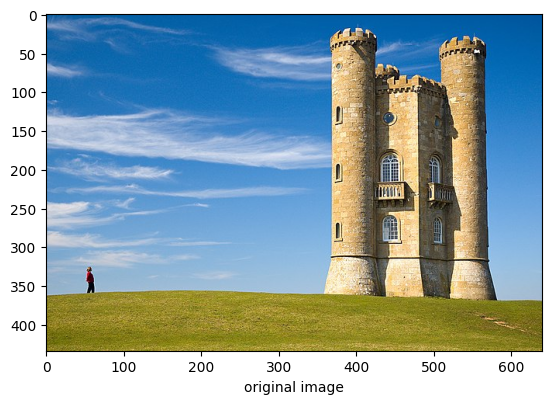

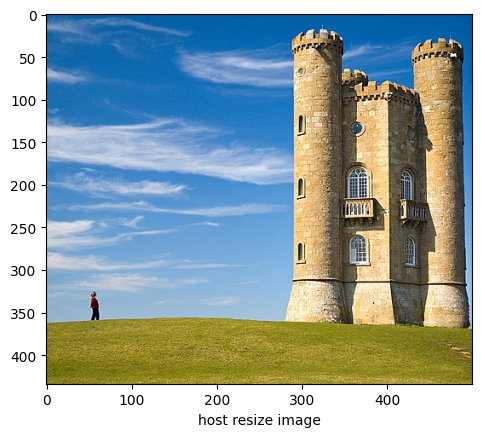

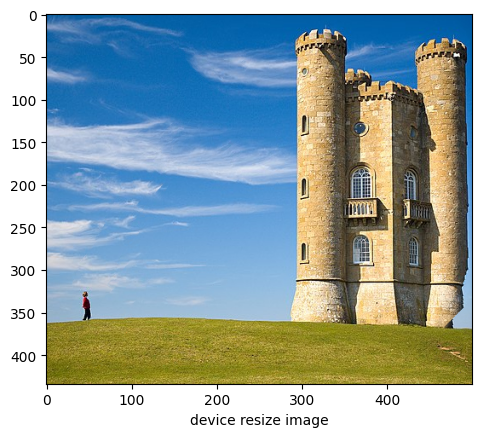

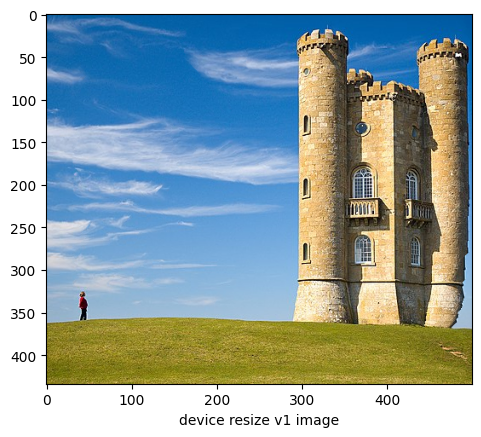

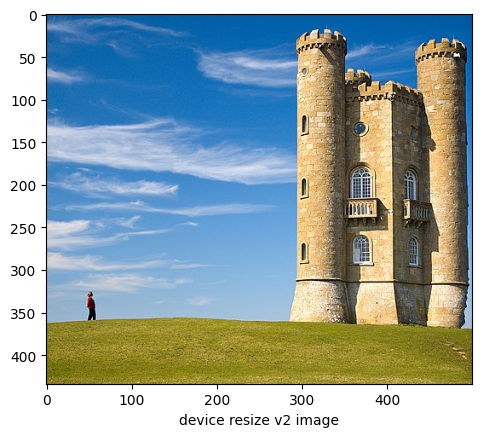

In [ ]:
!nvcc host.cu -o host.out
!./host.out broadcast.ppm 500

show_img("/content/broadcast.ppm", "original image")
show_img("/content/out_host_rgb.ppm", "host resize image")
show_img("/content/out_device_rgb.ppm", "device resize image")
show_img("/content/out_device_v1_rgb.ppm", "device resize v1 image")
show_img("/content/out_device_v2_rgb.ppm", "device resize v2 image")

## **Lady image**

Processing time use host: 6340.293457 ms

Processing time use device: 831.996094 ms

Compare error between host and device:
Error: 22.364889
Processing time use device version 1: 701.992310 ms

Compare error between host and device v1:
Error: 35.304661
Processing time use device version 2: 702.707764 ms

Compare error between host and device v2:
Error: 25.829237


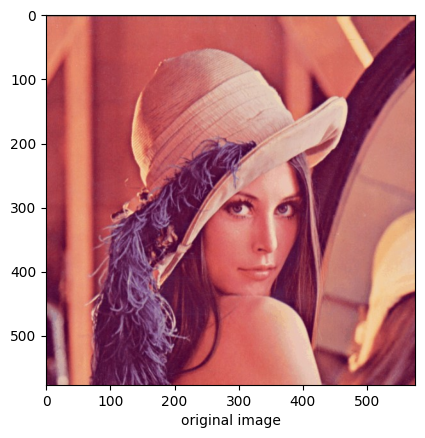

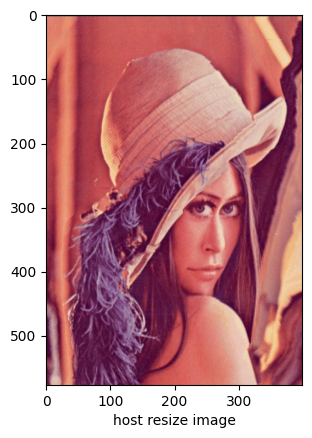

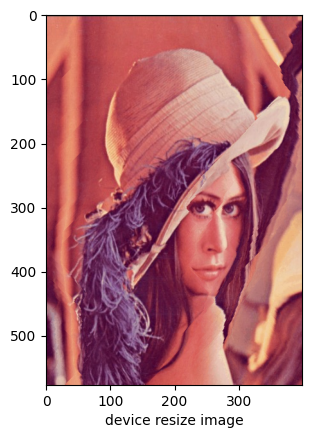

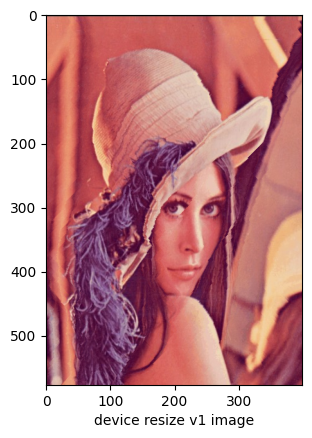

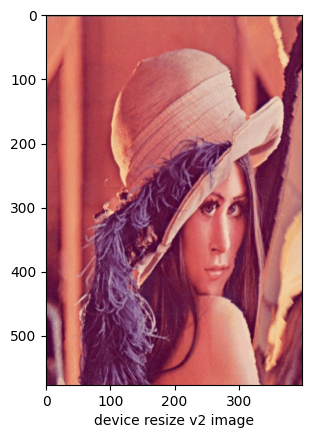

In [ ]:
!nvcc host.cu -o host.out
!./host.out lady.ppm 400

show_img("/content/lady.ppm", "original image")
show_img("/content/out_host_rgb.ppm", "host resize image")
show_img("/content/out_device_rgb.ppm", "device resize image")
show_img("/content/out_device_v1_rgb.ppm", "device resize v1 image")
show_img("/content/out_device_v2_rgb.ppm", "device resize v2 image")

## **Clock image**

Processing time use host: 20659.779297 ms

Processing time use device: 2624.168945 ms

Compare error between host and device:
Error: 20.558352
Processing time use device version 1: 2473.064453 ms

Compare error between host and device v1:
Error: 28.295086
Processing time use device version 2: 2505.611084 ms

Compare error between host and device v2:
Error: 20.745808


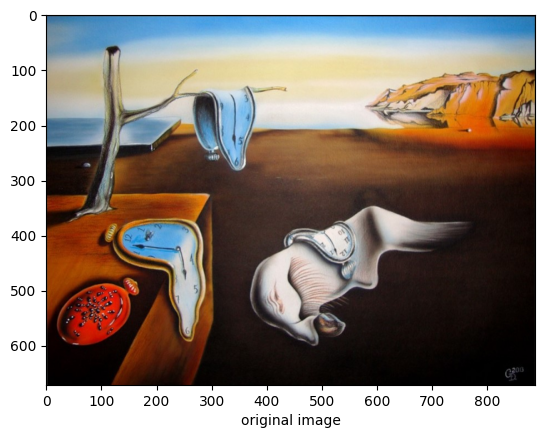

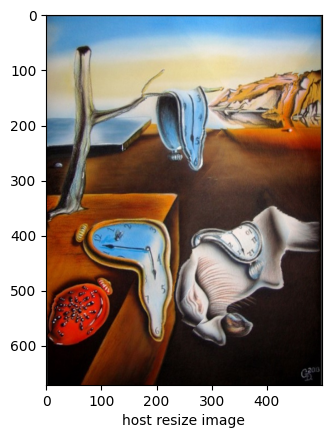

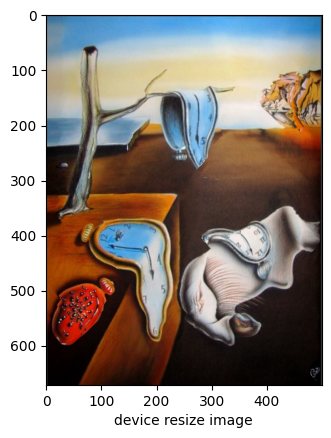

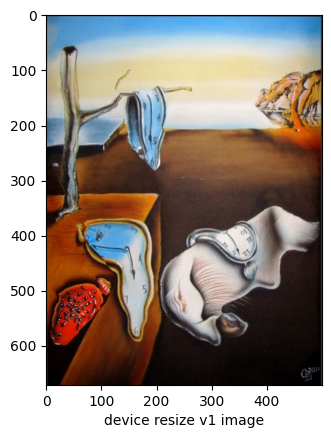

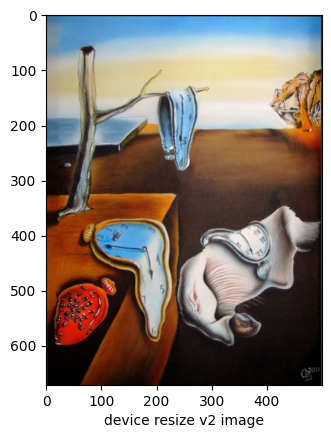

In [ ]:
!nvcc host.cu -o host.out
!./host.out clock.ppm 500

show_img("/content/clock.ppm", "original image")
show_img("/content/out_host_rgb.ppm", "host resize image")
show_img("/content/out_device_rgb.ppm", "device resize image")
show_img("/content/out_device_v1_rgb.ppm", "device resize v1 image")
show_img("/content/out_device_v2_rgb.ppm", "device resize v2 image")

# <h1> <b> 🎁 ĐÚC KẾT 🎁</b> </h1>

 Each member: What difficulties have you encountered?

* Vẫn còn sai số trên device và các version optimized.
* Tài liệu nghiên cứu và tham khảo còn khá ít.
* Việc tìm hiểu về các bộ nhớ đòi hỏi khá nhiều thời gian và công sức.

 Each member: What have you learned?
* Học được cách triển khai thuật toán từ tuần tự sang song song
* Hiểu rõ hơn về các bộ nhớ trên device.
* Hiểu được cách thức vận hành của các thread trong block của GPU.
* Hiểu được cách tối ưu hóa và hiệu suất của 1 bài toán.

 Your team: If you had more time, what would you do?
* Fix lỗi trên từng version của thuật toán.
* Có thêm nhiều version tối ưu khác.
* Hoàn thiện chỉnh chu bài báo cáo.

# <h1> <b> ✨ TÀI LIỆU THAM KHẢO ✨</b> </h1>

Slides from teacher Trọng Nghĩa

[Seam Carving - Image resizing with CUDA](https://github.com/the0nlyWyvern/seam-carving/tree/main)

https://github.com/nhathuy13598/Lap-trinh-song-song-GPU-Do-an-cuoi-ky?tab=readme-ov-file#2-y%C3%AAu-c%E1%BA%A7u-c%E1%BB%A7a-%C4%91%E1%BB%93-%C3%A1n